In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
file_path = '/Users/nova/Desktop/hackathon csv files/Q7.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,business_date,bill_total_billed,bill_total_net,payment_total_tip,order_take_out_type_label,venue_xref_id
0,2024-07-01,21.81,19.30,0.0,dinein,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...
1,2024-07-01,48.95,43.32,0.0,dinein,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...
2,2024-07-01,26.94,23.84,0.0,dinein,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...
3,2024-07-01,3.96,3.77,0.0,dinein,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...
4,2024-07-01,3.36,3.20,0.0,dinein,39e5b4830d4d9c14db7368a95b65d5463ea3d095203737...


In [5]:
df.describe()

,bill_total_billed,bill_total_net,payment_total_tip
count,8.954786e+06,8.954786e+06,8.954786e+06
mean,3.674831e+01,3.389894e+01,3.654212e+00
std,8.337650e+01,7.754356e+01,1.753186e+02
min,-5.731500e+03,-5.072120e+03,-2.531400e+02
25%,1.044000e+01,9.630000e+00,0.000000e+00
50%,2.189000e+01,2.000000e+01,0.000000e+00
75%,4.465000e+01,4.100000e+01,4.070000e+00
max,7.492861e+04,6.630850e+04,5.227156e+05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954786 entries, 0 to 8954785
Data columns (total 6 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   business_date              object 
 1   bill_total_billed          float64
 2   bill_total_net             float64
 3   payment_total_tip          float64
 4   order_take_out_type_label  object 
 5   venue_xref_id              object 
dtypes: float64(3), object(3)
memory usage: 409.9+ MB


In [7]:
# Convert to datetime format
df['business_date'] = pd.to_datetime(df['business_date'])

In [8]:
# Extract day and weekend info of the week
df['day_of_week'] = df['business_date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

In [9]:
# group by 
sales_by_day = df.groupby('day_of_week').agg({
    'bill_total_billed': 'sum',
    'bill_total_net': 'sum',
    'payment_total_tip': 'sum'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

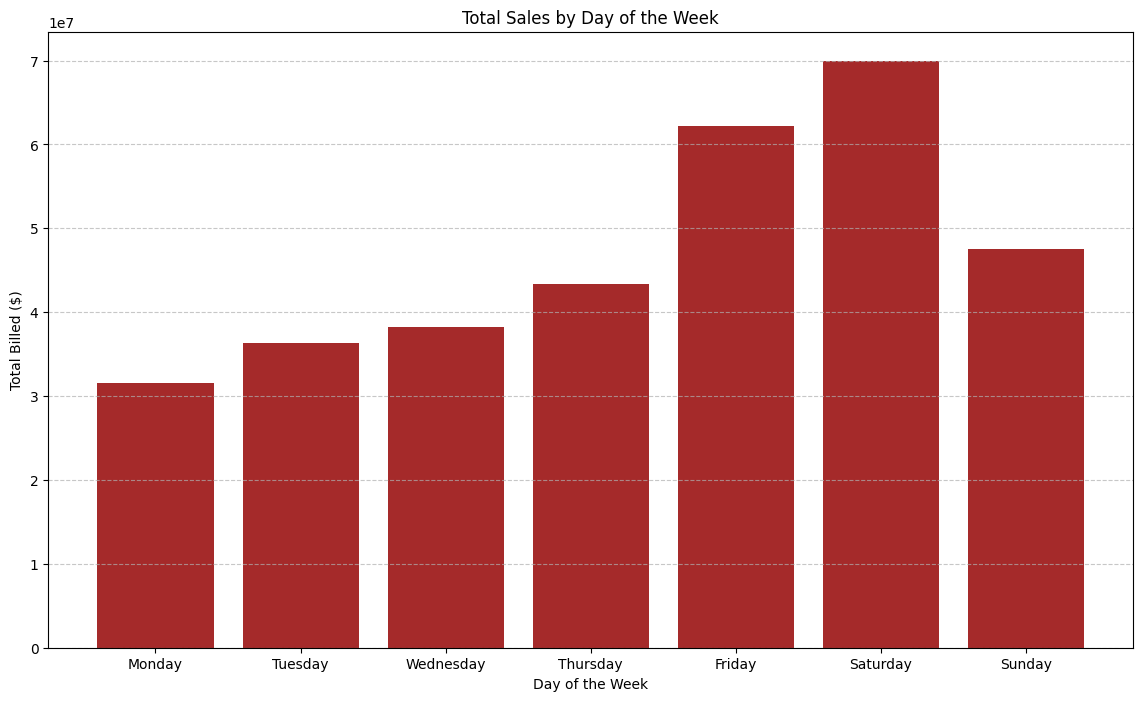

In [12]:
# plot Total Billed by Day of the Week
plt.figure(figsize=(14, 8))
plt.bar(sales_by_day.index, sales_by_day['bill_total_billed'], color='brown')

plt.xlabel('Day of the Week')
plt.ylabel('Total Billed ($)')
plt.title('Total Sales by Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# group by
sales_by_weekend = df.groupby('is_weekend').agg({
    'bill_total_billed': 'sum',
    'bill_total_net': 'sum',
    'payment_total_tip': 'sum'
})

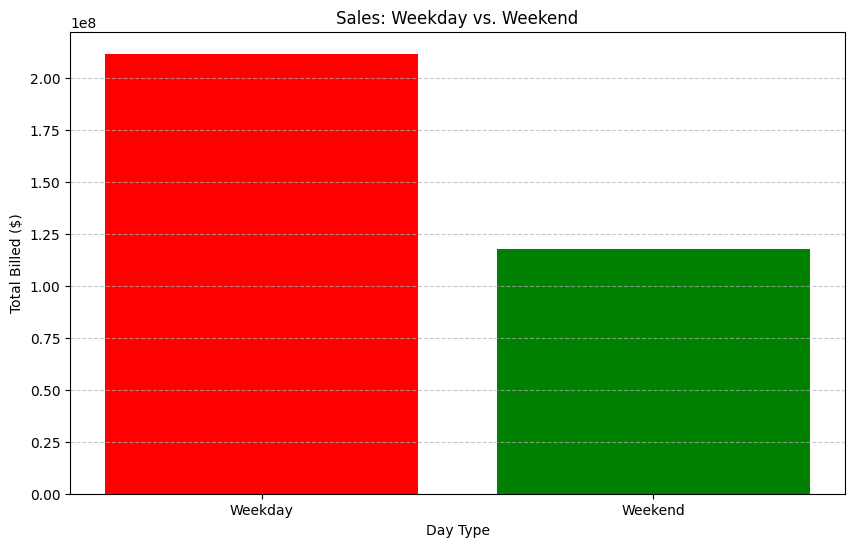

In [15]:
# plot Weekend vs. Weekday Sales
plt.figure(figsize=(10, 6))
plt.bar(['Weekday', 'Weekend'], sales_by_weekend['bill_total_billed'], color=['red', 'green'])

plt.xlabel('Day Type')
plt.ylabel('Total Billed ($)')
plt.title('Sales: Weekday vs. Weekend')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()